# Lab 6 --- models!

Student: Rebecca Beutel

Date: February 18, 2022

In [1]:
# load packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
from cartopy.feature import NaturalEarthFeature, GSHHSFeature
from matplotlib.colors import LogNorm

import cmocean.cm as cm
import copy
import xarray as xr

%matplotlib inline
plt.rcParams['font.size'] = 14

Load files:

In [2]:
nitrate    = xr.open_dataset('SalishSeaCast_day_avg_nitrate_20160725_20160804.nc')
physics    = xr.open_dataset('SalishSeaCast_day_avg_physics_20160725_20160804.nc')
bathymetry = xr.open_dataset('ubcSSnBathymetryV17-02_bdc8_1811_3f13.nc')

In [3]:
# Stations
iqifs, jqifs = 761, 137
isent, jsent = 707, 145

#### Plot Bathymetry

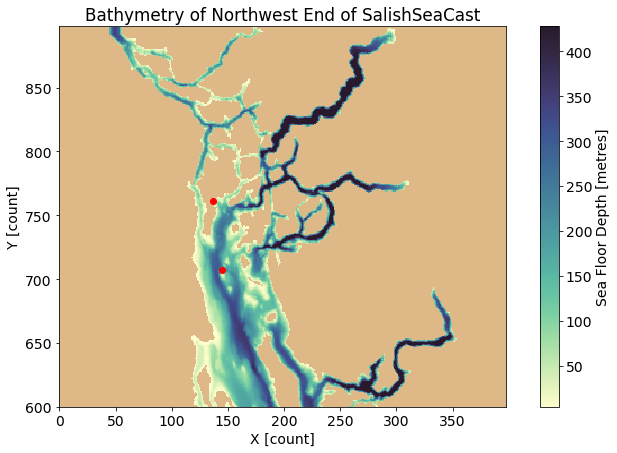

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
mycm = copy.copy(cm.deep)
mycm.set_bad('burlywood')
bathymetry.bathymetry.plot(ax=ax, cmap=mycm);
ax.set_ylim(600, 898)
ax.plot(jsent, isent, 'ro')
ax.plot(jqifs, iqifs, 'ro')
ax.set_aspect(500/440)
ax.set_title('Bathymetry of Northwest End of SalishSeaCast');
fig.savefig('bathynorth.png')

# Part A: Fit for Purpose

Create a time series plot of each of salinity, temperature and nitrate at the two stations QIFs(which is at grid point y=761, and x=137)2 and Sentry Shoal (gridy=707, gridx=145). I suggest you use the top grid point (deptht=0)4 which is at 0.5 m. Note that Evans et al, 2019 do not provide nitrate but we could expect that pCO2 might behave similarly as carbon is also taken up by biology during photosynthesis

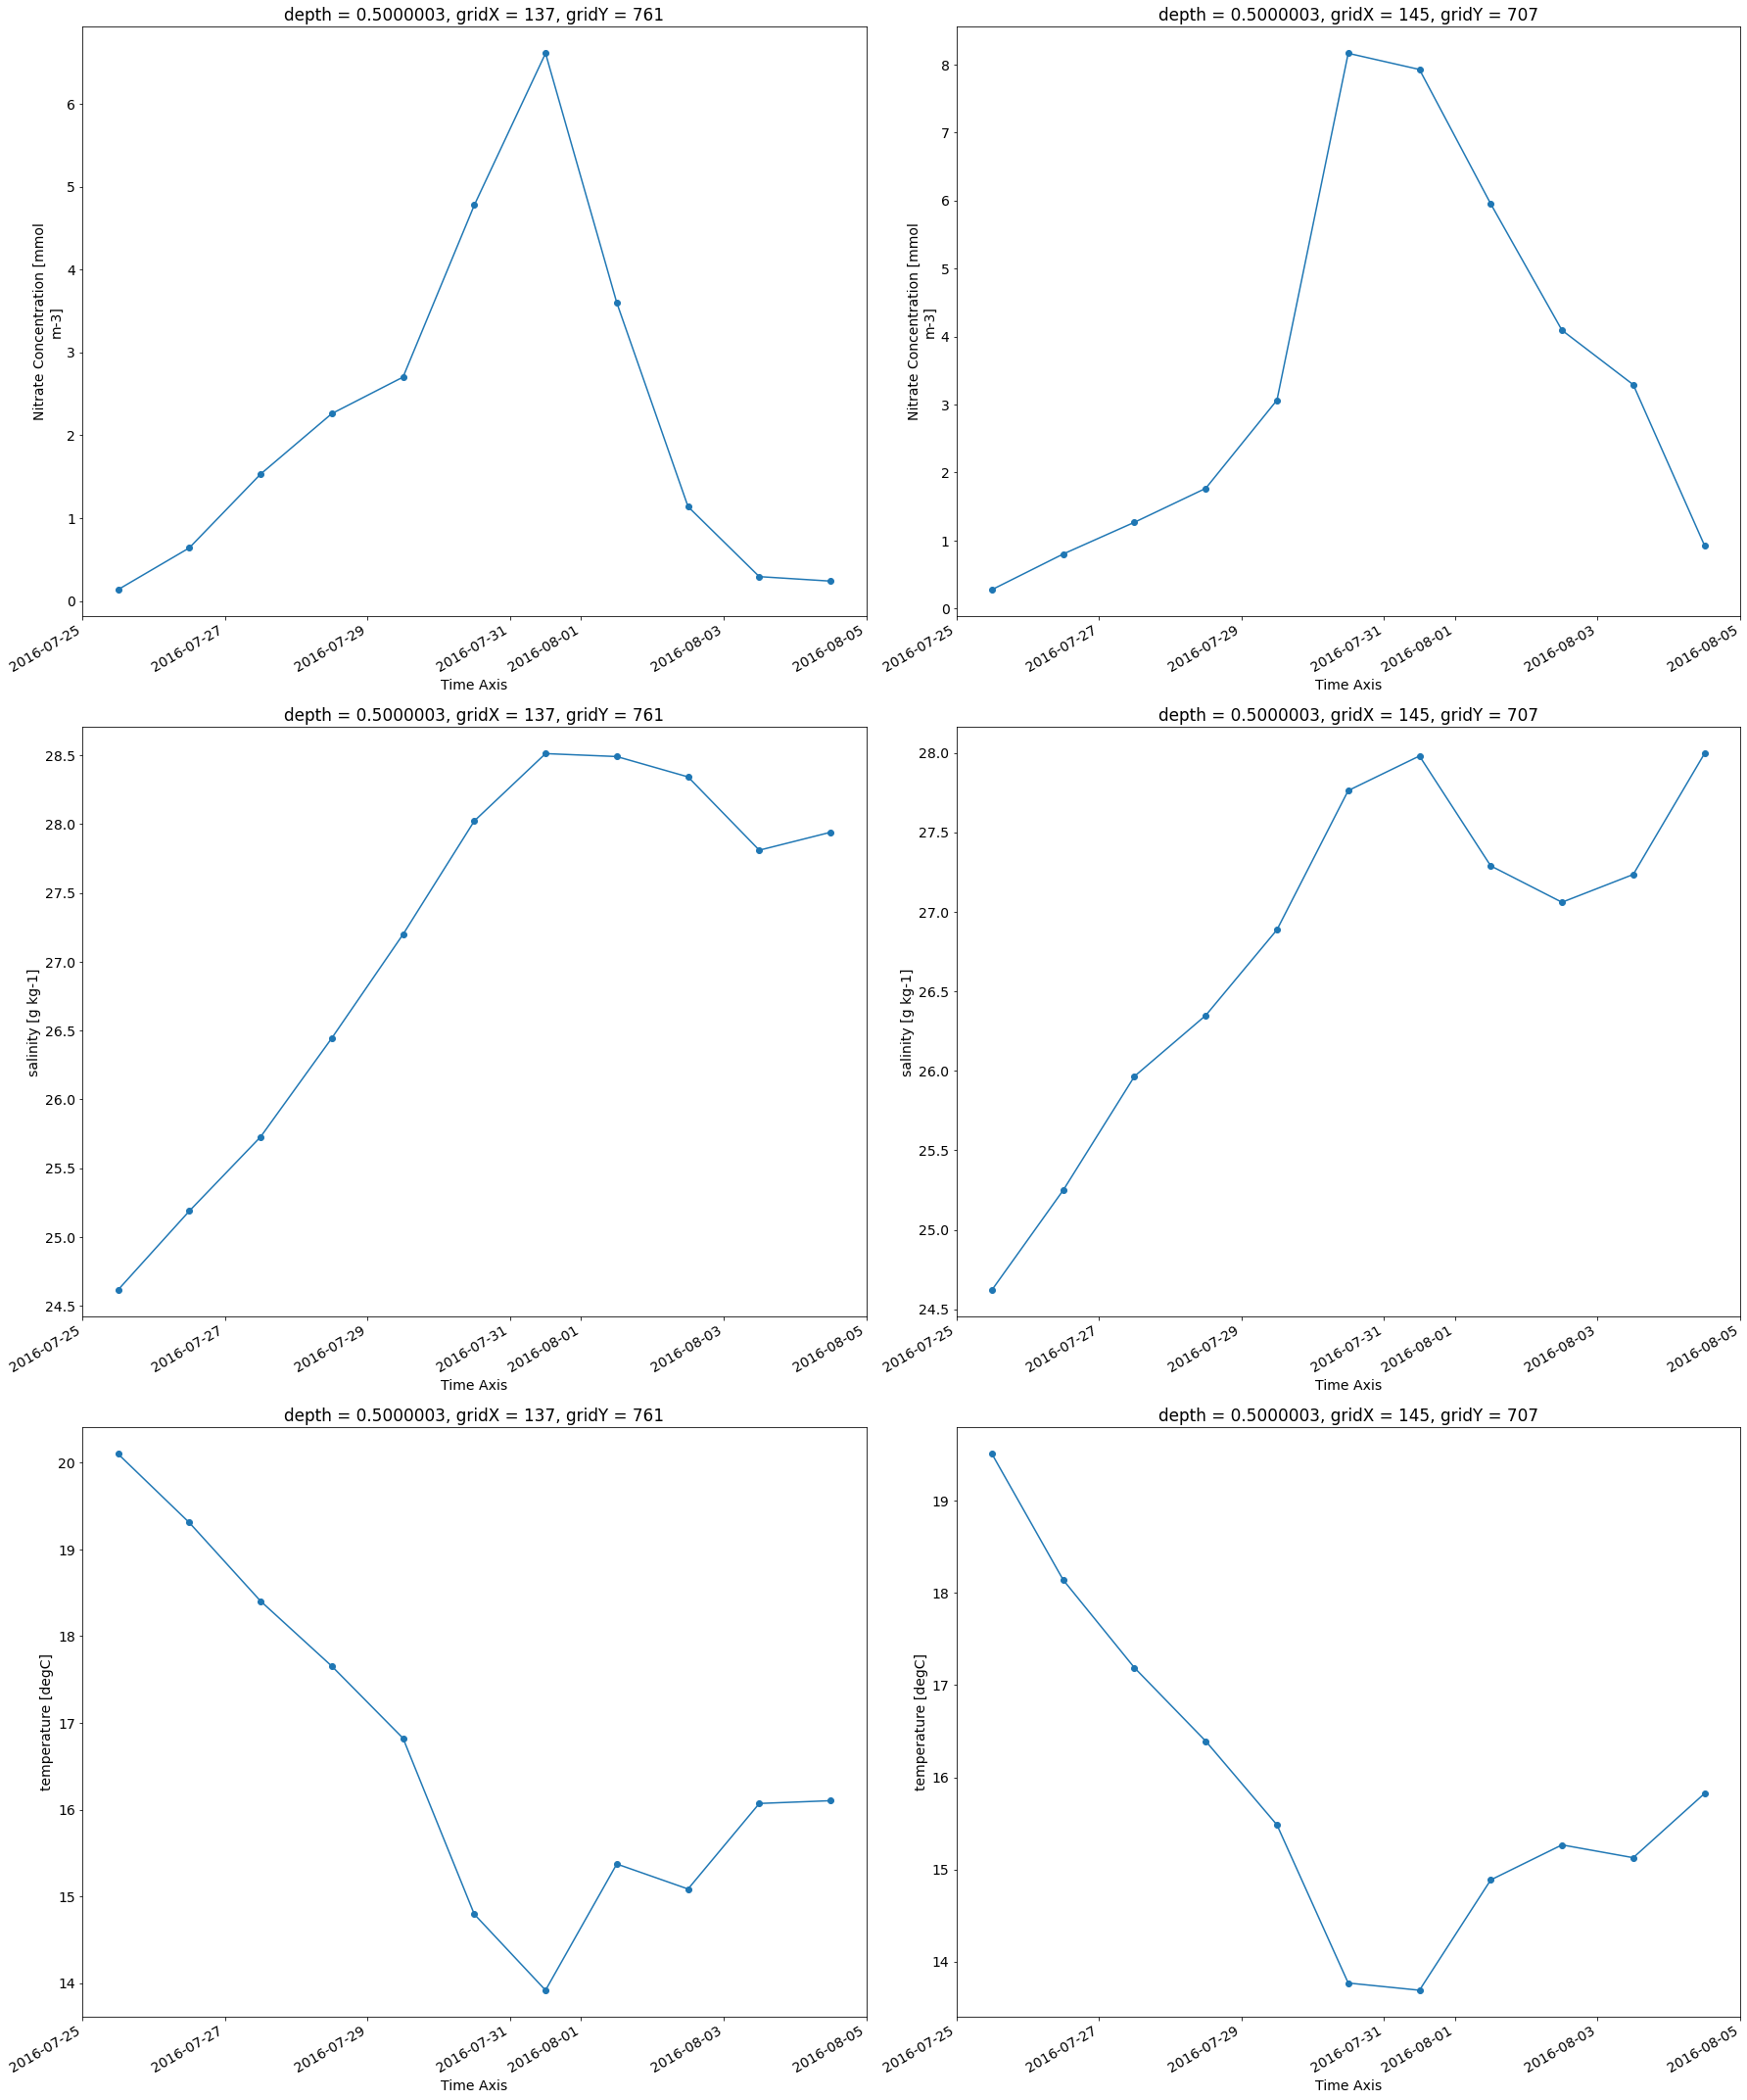

In [5]:
#first station QIF
fig, ax = plt.subplots(3, 2, figsize=(25, 30))
nitrate.nitrate[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[0,0]);
physics.vosaline[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[1,0]);
physics.votemper[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[2,0]);

nitrate.nitrate[:, 0, isent, jsent].plot(marker='o',ax=ax[0,1]);
physics.vosaline[:, 0, isent, jsent].plot(marker='o',ax=ax[1,1]);
physics.votemper[:, 0, isent, jsent].plot(marker='o',ax=ax[2,1]);

plt.tight_layout()

### Does the model reproduce the observed signals, qualitatively? <br>
A quick looks shows that both the model and the observations show similar signals at both stations from July 25th to August 5th 2016. In all cases the salinity and nitrate increase and the temperature decreases dramatically in the region between July 25th July 31st and then begins a slower return to previous condisiotns between August 1st and 5th. A deeper analysis of the alignment of the oberved and modelled signals in time and magnitude is provided in the answer to the next question. <br>
 

### How well does the model reproduce the signals, in timing and in amplitude? (Not thinking statistics here, just change in salinity observed versus modelled etc) <br>
#### Salinity <br>
In the observations from Evans et al. the salinity signal at QIFS remains at about 24 from the 25th of July to midday on the 27th, while in the model estimate at this location the salinity rises from 24.5 to 26 in this same time period. A sustained rise in the observed values at QIFS is not seen until July 31st when salinity the observations reach about 26 until beginning a slow decline on August 1st. In the model however the values rise steadily between the 25th and the 31st up to a salinity of 28.5 and begins a steady decline as well on August 31st. Thus in terms of salinity the model and observations at the QIFS station align in the timing of the peak and decline but are misaligned in the timing of when the rise to the peak occurs - in the model it is a steady rise from the 24th while in the obervations it is a very slight rise from the 25th until the 31st (with a quick fall and rise around the 28th) until a quick rise up to 26 midday on the 30th. In amplitude the July 25th minimum is higher by about 0.5 in the model and the July 31st maximum is higher by about 2.5 in the model. <br>
At the sentry shoal station the observations rises (with noise and oscillations) from 24 to 28 between July 25th and just before the 31st while the model rises from 24.5 to 28 from the 25th to August 1st. After the peak the observations lower by only about 0.5 (to about 27.5 by August 5th (with a quick dip on August 2nd) while the model has a more sustained dip between August 2nd and 4th before returning to its peak salinity of 28 on August 5th. Overall the timing of the peak between the model and the observations is off by about 1 day and the the magnitude matches rather closely (off by 0.5 in the Feb 24 mimimum, the same maximum, and off by 0.5 at the end of the event).<br>

#### Temperature <br>
The observed sea-surface-temperature at (SST) the QIFS station begins at 21 and decreases (with daily oscillations) to a minimum of about 13 on July 31st with the observed rate of decrease increasing between the 30th and the 31st, it then rises (with less pronounced daily oscillations) to 17 degrees on August 5th. The modelled begins at 20 degrees and decreases to 14 on the 31st with the rate of decrease increasing between the 29th and the 31st, it then rises unsteadilly to 16 by August 5th. The timing of the modelled and observed SST at QIFS aligned well but the modelled is less extreme by 1 degree in both the minimum and the maximum. <br>
The observed SSE at the Sentry Shoal station begins at 21 degrees and decreases at a rather constant rate (typically with two oscillations daily) until its minima of about 12.5 on July 30th, it then increases (also with less patterned oscillations) to about 17 degrees on August 5th. The modelled Sentry Shoal results begin at 19.5 degrees and decrease to just bellow 14 on July 30th and dip very slightly lower on July 31st, it then rises unsteadily to just below 16 degrees on August 5th. Again the temperature resutls from the modeled and observed values match closely but the magnitudes differ - the minima is about 1.5 degrees less extreme in the modelled results and the beginning and ending values are lower by 1.5 and 1 degrees repectively in the modelled results, showing that the model does not reach the same extremes as the observations. <br>

#### Nitrate (similar to the CO2 signal in the observations) <br>
NOTE: the magnitude difference will not be compared here at it is two different constituents, but the timing of minima/maxima will. <br>
In the observations the concentration at both stations begins and ends at the same level, with the concetration at the QIFS station slightly higher at both ends. The QIFS signal has two peaks (separated by a sharp dip) on July 31st while the Sentry Shoal station peaks on July 30th; the QIFS peaks are larger in magnitude than the Sentry Shoal peak. <br>
The concetration at the QIFS station begins and end at the same value while the Sentry Shoal concetration is slightly higher on August 5th then where it began. In the model the QIFS location peaks sharply on July 31st while Sentry Shoal has a more rounded peak on July 30th and 31st, the magnitude of the QIFS peak is less than the Sentry Shoal peak. <br>
Overall the timing of the modelled and obersed values matches well at both stations, but the relative magnitude does not (the QIFS has the larger magnitude peak in the observations but has the smaller in the model and the QIFS starting and ending locations are higher than Sentry Shoal in the observations but they are about equal in the model). 

### Is the model better at the more open station (Sentry Shoal) or the bay station (QIFs)?
In both timing (in particular the temperature timing) and magnitude (in particualr the salinity magnitude) the model is better at representing the more open water station (Sentry Shoal). 

### Is the model fit for purpose: aka can we use it to investigate the observed phenomena? What are the caveats?
Yes, the model is fit for the purpose of determining the driver of the August 2016 event as it still matches the overall trend at both stations and matches the open water station quite well. We know based on the comparison to oberservations however that the model is less accurate in more confined areas close to the coast - so any conclusions drawn should be largely based from data from open water regions rather than their coastal counterparts. <br>
Also is it clear from comparing the observations to the model that the daily model results are incapable of capturing high frequency variability.

# Part B: Is it vertical mixing

Evans et al (2019) suggest wind-driven mixing as the source. The model provides vertical profiles, not just single depth observations. Investigate whether the model suggests the response is vertical mixing.

### What is conserved during vertical mixing?
During vertical mixing mass is conserved over the water column since vertical mixing implies that no parcels of water are entering or leaving the control volume (the control volume being one column of water). Thus the sum of salinity over the profile should remain the same. Nitrate is less conservative as it may be consumed due to biological uptake add temperature can be lost to its surroundings.

### Plot profiles over time at the two stations of the three quantities.

Text(0.5, 1.0, 'QIF Nitrate')

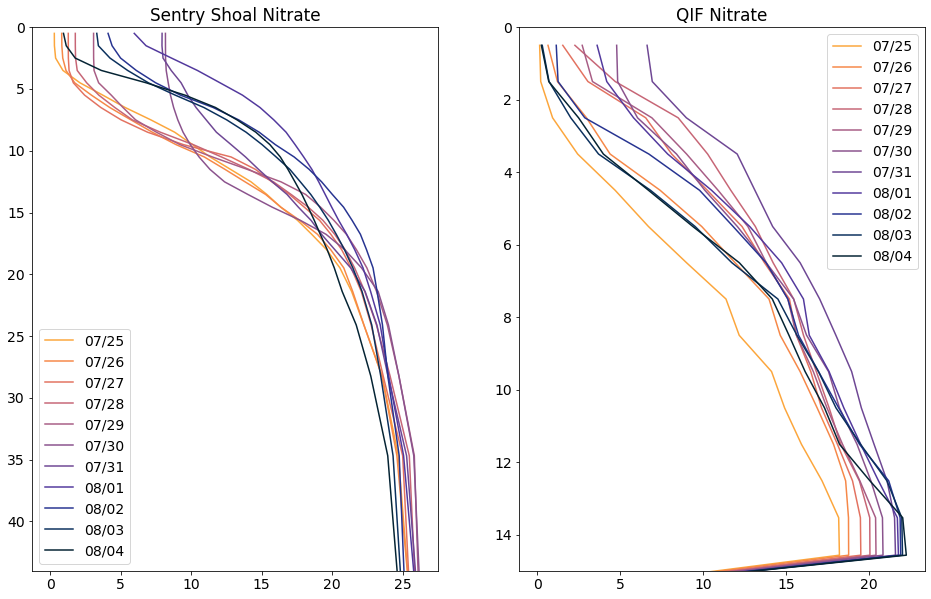

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(nitrate.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[0].plot(nitrate.nitrate[i,:,isent,jsent], nitrate.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Nitrate')


for i in range(len(nitrate.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(nitrate.nitrate[i,:,iqifs,jqifs], nitrate.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Nitrate')

Text(0.5, 1.0, 'QIF Salinity')

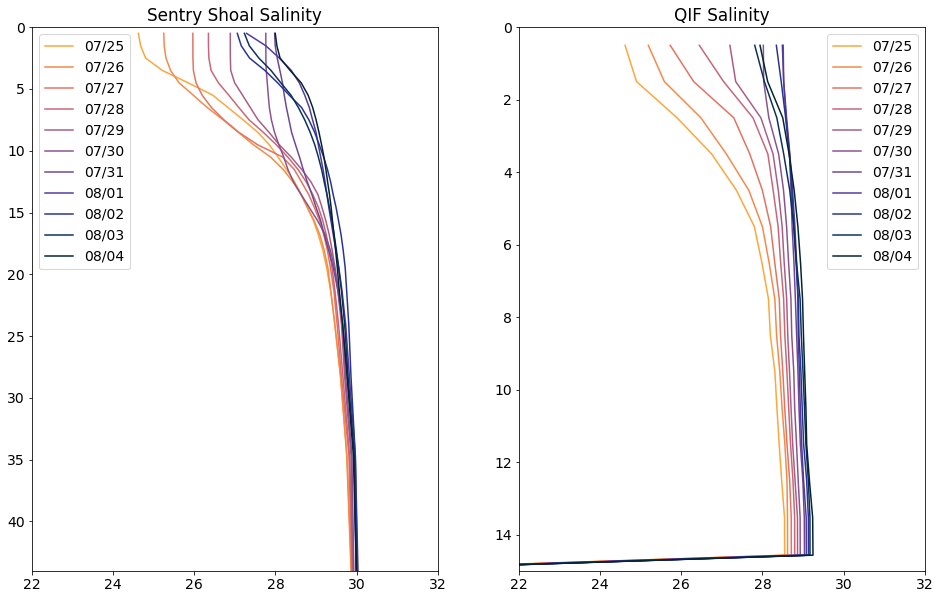

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(physics.time)):
    time = pd.to_datetime(str(physics.time[i].values)).strftime("%m/%d")
    ax[0].plot(physics.vosaline[i,:,isent,jsent], physics.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].set_xlim([22,32])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Salinity')


for i in range(len(physics.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(physics.vosaline[i,:,iqifs,jqifs], physics.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].set_xlim([22,32])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Salinity')

Text(0.5, 1.0, 'QIF Temperature')

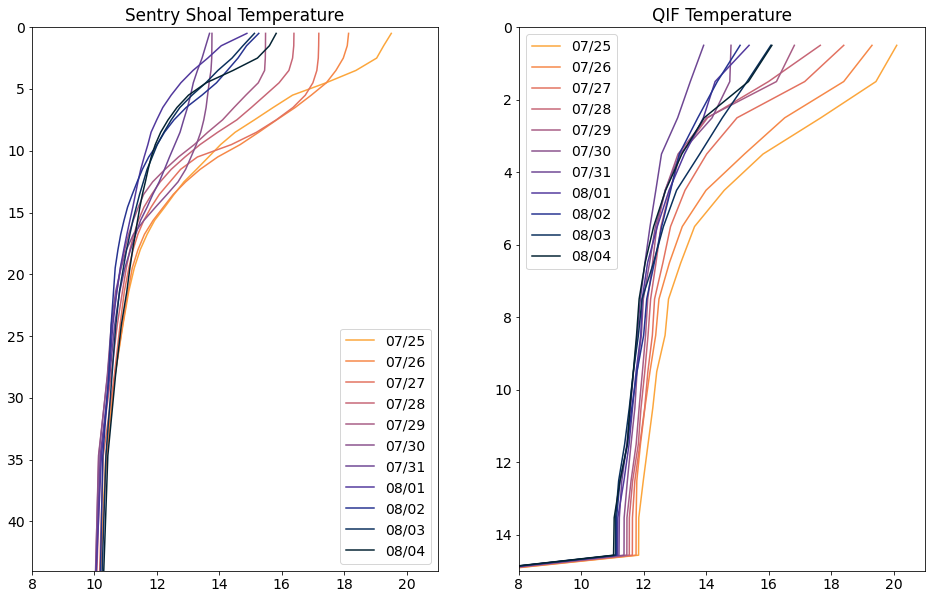

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(physics.time)):
    time = pd.to_datetime(str(physics.time[i].values)).strftime("%m/%d")
    ax[0].plot(physics.votemper[i,:,isent,jsent], physics.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].set_xlim([8,21])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Temperature')


for i in range(len(physics.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(physics.votemper[i,:,iqifs,jqifs], physics.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].set_xlim([8,21])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Temperature')

### Do they resemble the expected changes during wind-driven surface mixing?<br>
In wind-driven surface mixing one would expect that the depth of the mixed surface layer would deepen, surface salinities would increase due to input from the lower layer, and the salinities at depth would decrease in turn due to loss to the upper layer. In these profiles however the surface layer becomes more saline, gets colder, and increses in nitrate concentration (as expected in vertical-mixing) but the lower layer also moves in these same directions. This is particulalry obvious in the salinity plot at both stations. Clearly the characteristics of the water over one column are not being conserved, so vertical-mixing alone cannot explain the change.<br>

### Is the quantity conserved over the the period, within model errors? <br>
The figure below shows the difference between the salinity summed over the profiles on July 25th to the proceedings days until August 5th. The difference at QIFS reaches 20 and Sentry Shoal as high as 30. <br>
In Olsen et al. the root mean squared error in salinity was found to range between 0.82 and 2.28 g/kg. Taking the maximum of this range (model values compared to values from the Pacific Salmon Foundation) and mulitplying it by the number of points in each profile os that it can be comapred ot the summed difference over the profile we get a maximum error of 54.72 g/kg for Sentry Shoal (2.28x24) and 34.20 g/kg for QIFS. Although it is unlikely that every point in the profile was on the maximum end of the error range the uncertainty in the data does not allow us to say for certain that vertical-mixing did not play a role in the temperature, salinity, and nitrate signal. 

Text(0, 0.5, 'Difference from initial salinity total')

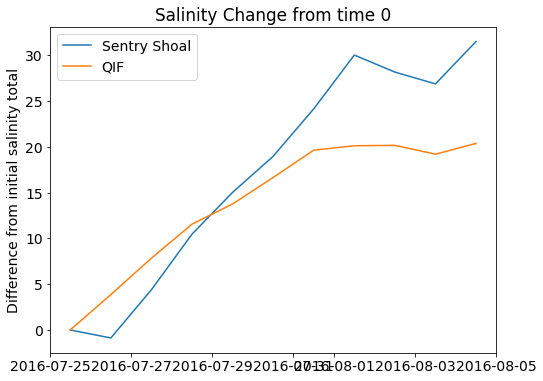

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(physics.time, physics.vosaline[:,:,isent,jsent].sum(axis=1)-sum(physics.vosaline[0,:,isent,jsent]), label ='Sentry Shoal')
ax.plot(physics.time, physics.vosaline[:,:,iqifs,jqifs].sum(axis=1)-sum(physics.vosaline[0,:,iqifs,jqifs]), label ='QIF')
ax.legend()
ax.set_title('Salinity Change from time 0')
ax.set_ylabel('Difference from initial salinity total')

# Part C: Back tracking the peak values

Could it be due/partially due to the coastal upwelling suggested by Moore-Maley and Allen (2022) or the tidal mixing jet suggested by Olson et al (2020)? To do this, can we track the water observed at the peak of the event backward in time?

### Identify the salinity, temperature and nitrate values at the open station at the peak of the event. Put a range around those physical values (say 0.5 g/kg, 1oC). We need to also consider that nitrate can be taken up by biology so it could increase as we go back in time. Consider your value a minimum nitrate value. <br>
Since I am plotting using modelled values the peaks will be chosen from the modelled results instead of the observations. <br>
* Temperature at peak = 14
* Salinity at peak = 28
* Nitrate at peak = 6.5

In [19]:
tep = 14
sal = 28
nit = 8

### Map the location of that salinity, temperature and nitrate range at the peak of the event (peak of pCO2). I used masked arrays in python to do this selection. Identify the regions where all three ranges happen at once. (See figure below). This water mass is a three dimensional object. I also plot cross-sections. You can also look at various depths from the surface.

In [14]:
def dotheplots(bathymetry, day, kd, isent, jsent, ey, ex, tepmin, tepmax, salmin, salmax, nitmin):
    '''
    bathymetry: xarray of bathmetry file
    day: day of file (so Jul 25 is 0)
    kd: depth index (0 is surface)
    isent, jsent: indexes of Sentry Shoal
    ex, ey: indexes of another point
    tepmin, tepmax: temperature limits
    salmin, salmax: salinity limits
    nitmin: nitrate limit
    '''
    
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))
    
    imin, imax = 650, 800
    jmin, jmax = 100, 215
    
    # bathymetry plots
    bathymetry.bathymetry.plot(ax=axs[0, 0], cmap=mycm);
    axs[0, 0].set_ylim(imin, imax)
    axs[0, 0].set_xlim(jmin, jmax)
    bathymetry.bathymetry.plot(ax=axs[2, 0], cmap=mycm);
    axs[2, 0].set_ylim(imin, imax)
    axs[2, 0].set_xlim(jmin, jmax)
    axs[0, 0].set_title('Bathymetry with Points')
    axs[2, 0].set_aspect(500/440)
    axs[2, 0].set_title('Bathymetry with Cross-sections')
    
    # temperature plot
    dm = xr.open_dataset('/data/sallen/results/PRODIGY/SalishSeaCast_day_avg_physics_20160725_20160804.nc')
    # temperature, masked between the limits
    myarray = np.ma.array(dm.votemper[day, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[day, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, kd, imin:imax, jmin:jmax] < tepmin))
    colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal, shading='auto')
    fig.colorbar(colours, ax=axs[0, 1])
    axs[0, 1].set_title(f'Temperature at {kd+0.5} m (conservative $^o$C)')
    
    # salinity plot
    # salinity, masked between the limits
    myarray = np.ma.array(dm.vosaline[day, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[day, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, kd, imin:imax, jmin:jmax] < salmin))
    colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline, shading='auto')
    axs[0, 2].set_title(f'Salinity at {kd+0.5} m (g/kg)')
    fig.colorbar(colours, ax=axs[0, 2])
    
    # nitrate
    ds = xr.open_dataset('/data/sallen/results/PRODIGY/SalishSeaCast_day_avg_nitrate_20160725_20160804.nc')
    myarray = np.ma.array(ds.nitrate[day, kd, imin:imax, jmin:jmax], 
                      mask= ds.nitrate[day, kd, imin:imax, jmin:jmax] < nitmin)
    colours = axs[1, 0].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.rain, shading='auto')
    fig.colorbar(colours, ax=axs[1, 0])
    axs[1, 0].set_title(f'Nitrate at {kd+0.5} m (uM)')
    
    # intersection of the temperature, salinity and nitrate on this surface
    myarray = np.ma.array(np.ones((imax-imin, jmax-jmin)), 
                      mask= (dm.votemper[day, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[day, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, kd, imin:imax, jmin:jmax] < salmin)
                          | (ds.nitrate[day, kd, imin:imax, jmin:jmax] < nitmin))
    myarray.mask = myarray.mask | np.isnan(bathymetry.bathymetry[imin-600:imax-600, jmin:jmax])
    colours = axs[1, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.dense, shading='auto')
    fig.colorbar(colours, ax=axs[1, 1])
    axs[1, 1].set_title(f'Intersection of all three Ranges at {kd+0.5} m');
    
    # create the full 3-D object of this water mass down to 15 m and then plot it in various ways to look at it
    kdd = 15
    watermass = np.ma.array(np.ones((kdd, imax-imin, jmax-jmin)), 
                      mask= (dm.votemper[day, 0:kdd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, 0:kdd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[day, 0:kdd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, 0:kdd, imin:imax, jmin:jmax] < salmin)
                           | (ds.nitrate[day, 0:kdd, imin:imax, jmin:jmax] < nitmin)
                       )
    
    # number of depth points with this water mass
    vertsum = watermass.sum(axis=0)
    vertsum.mask = vertsum.mask |  np.isnan(bathymetry.bathymetry[imin-600:imax-600, jmin:jmax])
    colours = axs[1, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), vertsum, cmap='plasma', shading='auto')
    fig.colorbar(colours, ax=axs[1, 2])
    axs[1, 2].set_title('Thickness of intersection of all three Ranges (m)');

    # add our points to these plots
    for ax in axs[0]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(ex+0.5, ey+0.5, 'mo')
        ax.set_aspect(500/440)
    for ax in axs[1]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(ex+0.5, ey+0.5, 'mo')
        ax.set_aspect(500/440)
        
    # vertical crossections
    axs[2, 0].plot([jmin, jmax], [ey+0.5, ey+0.5],  'r-')
    axs[2, 0].plot([ex+0.5, ex+0.5], [imin, imax],  'g-')
    
    # along the red line (across the strait)
    axs[2, 1].pcolormesh(np.arange(jmin+1, jmax), np.arange(15), watermass[:, ey-imin, 1:], shading='auto')
    axs[2, 1].plot(jsent+0.5, 0+0.5, 'r*');
    axs[2, 1].plot(ex+0.5, kd+0.5, 'mo')
    axs[2, 1].invert_yaxis()
    axs[2, 1].set_ylabel('Depth (m)')
    axs[2, 1].set_xlabel('x grid point')
    axs[2, 1].set_title('Location of Water Mass along Red Line');
    
    # along the green line (along the strait)
    axs[2, 2].pcolormesh(np.arange(imin, imax), np.arange(15), watermass[:, :, ex-jmin], shading='auto')
    axs[2, 2].plot(isent+0.5, 0+0.5, 'r*');
    axs[2, 2].plot(ey+0.5, kd+0.5, 'mo');
    axs[2, 2].set_ylabel('Depth (m)')
    axs[2, 2].set_xlabel('y grid point')
    axs[2, 2].invert_yaxis()
    axs[2, 1].set_title('Location of Water Mass along Green Line');
    fig.savefig('exampleplot2.png')

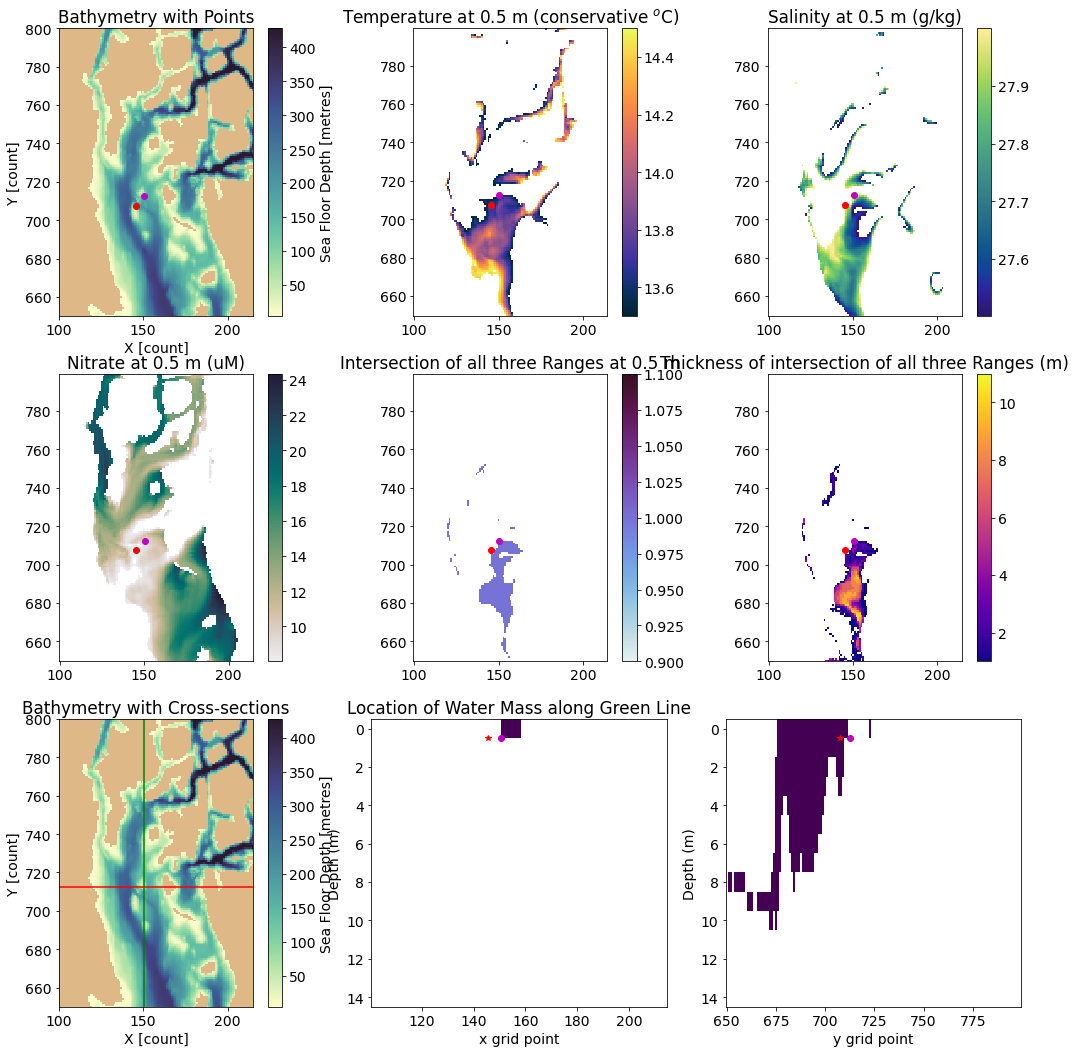

In [22]:
# dotheplots(bathymetry, day, kd, isent, jsent, ey, ex, tepmin, tepmax, salmin, salmax, nitmin)
dotheplots(bathymetry, 6, 0, isent, jsent, isent+5, jsent+5, tep-0.5, tep+0.5, sal-0.5, sal,8)

### Now go back to the day before. Where are the possible locations/depths of the your water? What is closest to the location the next day (aka the peak)? Note that this piece of the assignment is exploratory and a bit subjective. You would need to do much tightening to publish it! Don’t forget to look in three-dimensions.

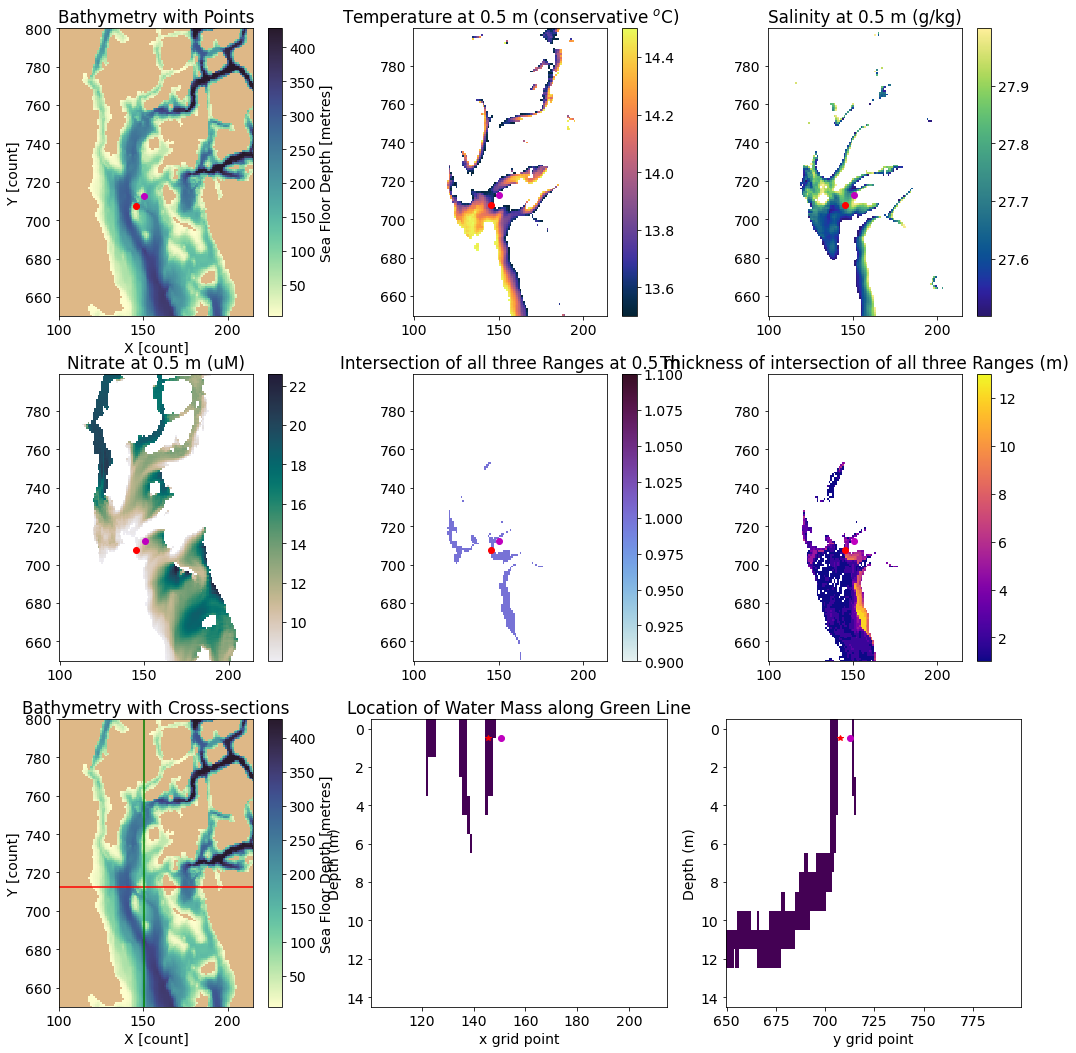

In [24]:
dotheplots(bathymetry, 5, 0, isent, jsent, isent+5, jsent+5, tep-0.5, tep+0.5, sal-0.5, sal,8)

###  Step back another day see if you can figure out where the water came from.

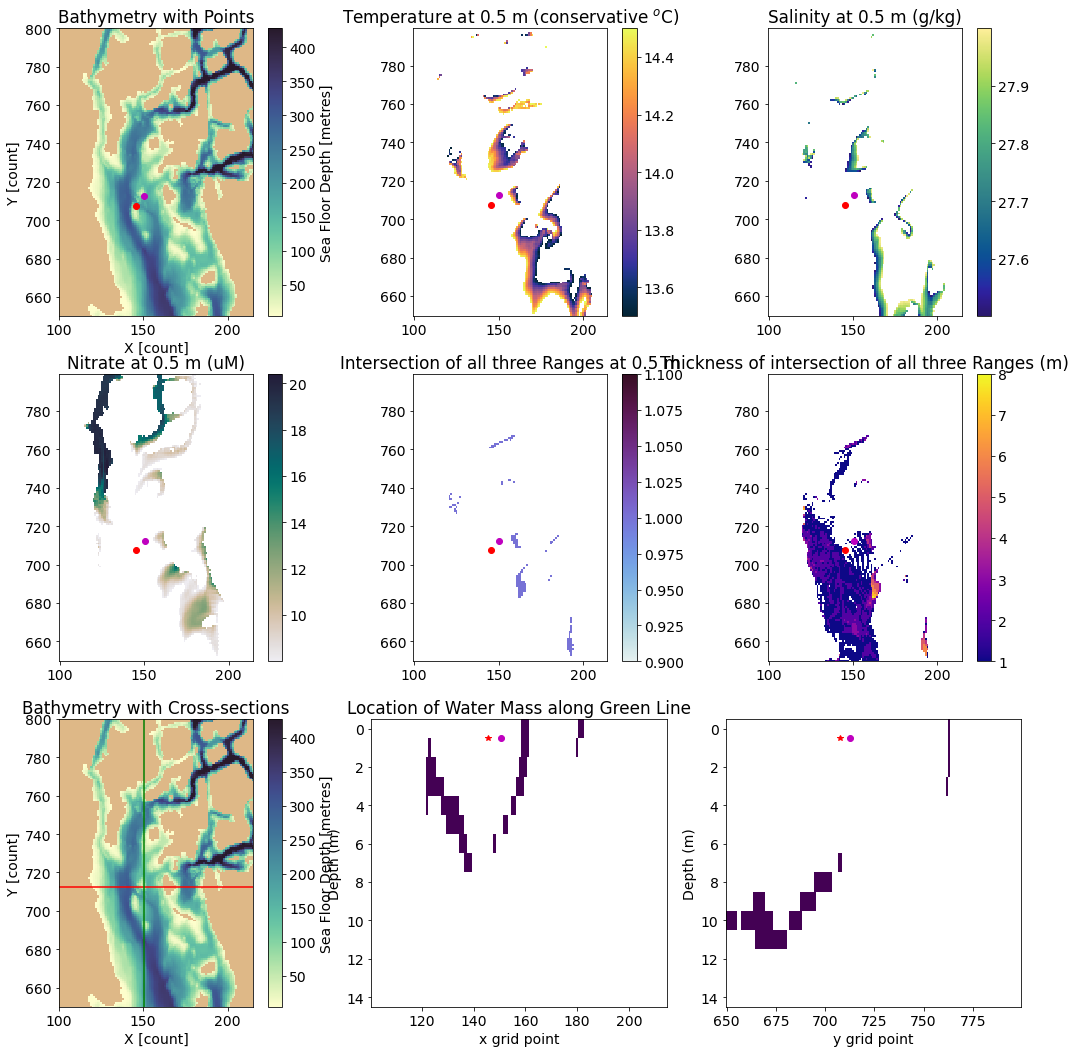

In [25]:
dotheplots(bathymetry, 4, 0, isent, jsent, isent+5, jsent+5, tep-0.5, tep+0.5, sal-0.5, sal,8)

### Given where the water appears to come from and its trajectory over time, do you see trace of coastal upwelling or the influence of the tidal mixing jet?<br>
Based upon looking at profiles two days before the peak of the event it appears that the water parcels that fit into the ranges provided (hereafter refered to as source water) follow the bathymetry. Then, looking at both the profiles and the thickness of intersection plots on day 5 the thickness of the intersection increases sharply along the eastern shore of the Strait of Georgia (SoG). By day 5 this "thick" region of source water intersects with the Sentry Shoal station and by day 6 has almost completely moved past it. <br>
The original location of the source water being at depth and the thickenning of this water along the eastern shore followed by its movement westward indicates that the event was triggered by coastal upwelling. If a jet from Johnstone Strait were responsable one would expect to see a clear source-water signal coming from the north-west.